In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the time series data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS')
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame
df = df.drop(columns=uncertainty_columns)

# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

# Extract month from the index
df['Month'] = df.index.month



KeyboardInterrupt: 

In [11]:
# Create a season label based on month
def label_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [12]:
df['Season'] = df['Month'].apply(label_season)

In [13]:
# Select features and target
features = df[['AverageTemperature']]
target = df['Season']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7266881028938906
              precision    recall  f1-score   support

      Autumn       0.62      0.57      0.60       159
      Spring       0.59      0.59      0.59       163
      Summer       0.86      0.90      0.88       154
      Winter       0.82      0.86      0.84       146

    accuracy                           0.73       622
   macro avg       0.73      0.73      0.73       622
weighted avg       0.72      0.73      0.72       622



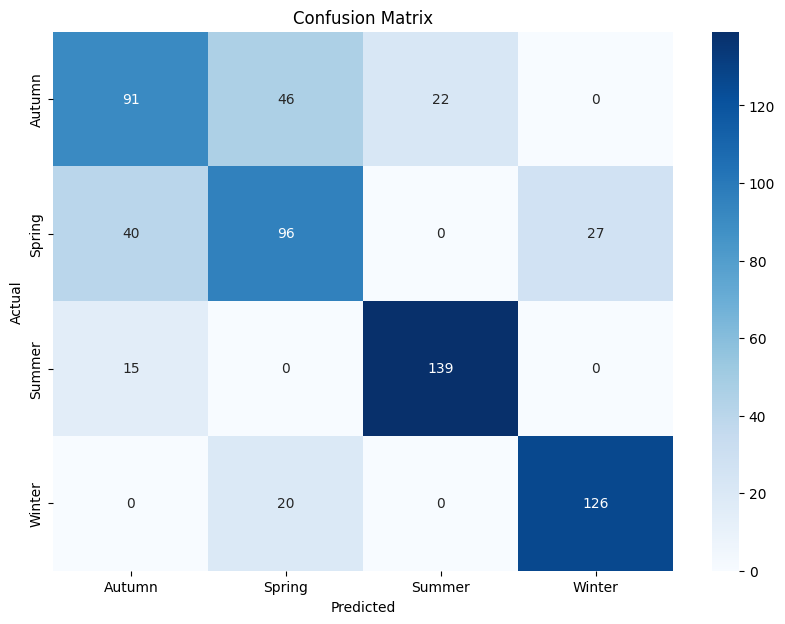

In [14]:
# Confusion matrix visualization
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\yuta\AppData\Local\Temp\ipykernel_19016\1598050559.py:19: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


Accuracy (1841~1920 training): 0.6242424242424243
              precision    recall  f1-score   support

      Autumn       0.39      0.40      0.40        40
      Spring       0.49      0.57      0.53        42
      Summer       0.74      0.76      0.75        42
      Winter       0.97      0.76      0.85        41

    accuracy                           0.62       165
   macro avg       0.65      0.62      0.63       165
weighted avg       0.65      0.62      0.63       165



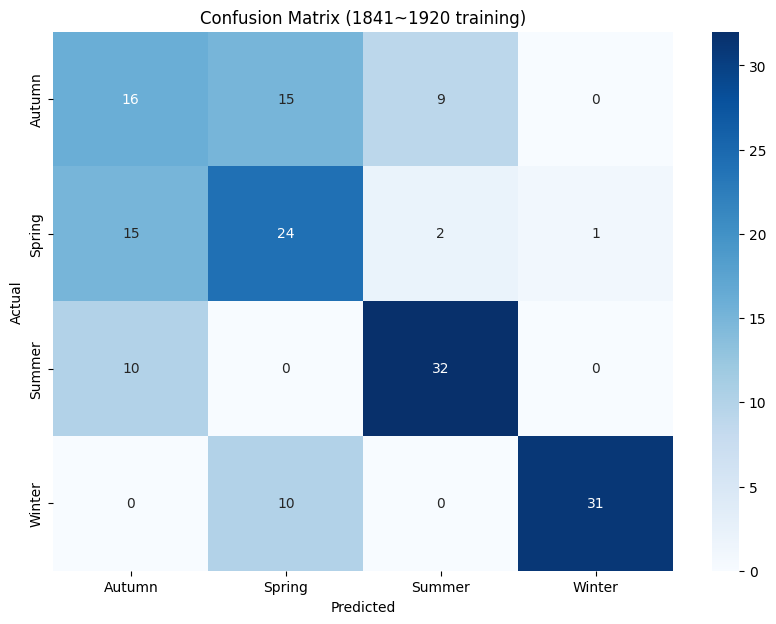

Accuracy (1920~2000 training): 0.7333333333333333
              precision    recall  f1-score   support

      Autumn       0.61      0.62      0.62        40
      Spring       0.59      0.69      0.64        42
      Summer       0.92      0.81      0.86        42
      Winter       0.87      0.80      0.84        41

    accuracy                           0.73       165
   macro avg       0.75      0.73      0.74       165
weighted avg       0.75      0.73      0.74       165



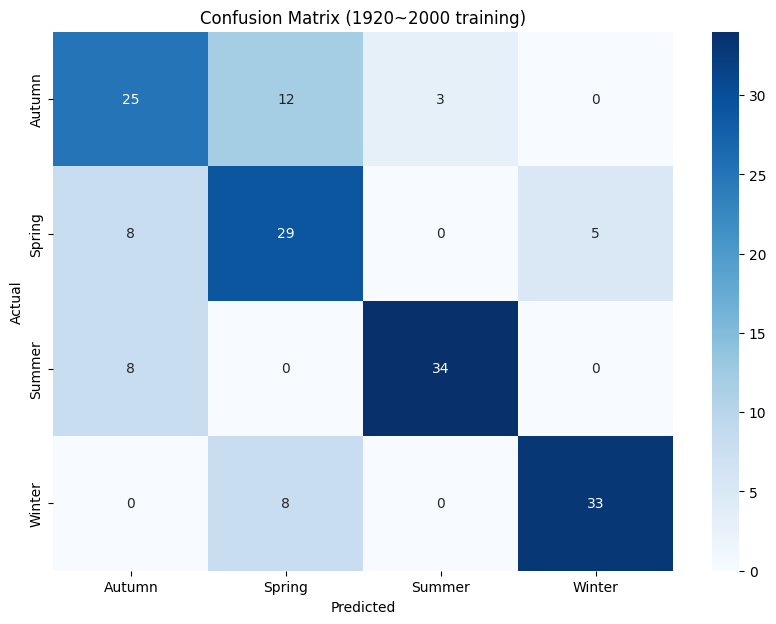

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency to the start of the month
df = df.asfreq('MS')

# Drop columns that contain 'Uncertainty'
uncertainty_columns = df.filter(like='Uncertainty').columns
df = df.drop(columns=uncertainty_columns)

# Interpolate missing values
df.interpolate(method='linear', inplace=True)

# Add month information
df['Month'] = df.index.month

# Label the seasons based on the month
def label_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(label_season)

# Select features and target
features = df[['AverageTemperature']]
target = df['Season']

# Split the data (training with data from 1841 to 1920)
train_data_1 = df['1841':'1920']
test_data = df['2000':]

X_train_1 = train_data_1[['AverageTemperature']]
y_train_1 = train_data_1['Season']
X_test = test_data[['AverageTemperature']]
y_test = test_data['Season']

# Train the model (training with data from 1841 to 1920)
clf_1 = RandomForestClassifier()
clf_1.fit(X_train_1, y_train_1)

# Predict and evaluate (test with data from 2000 onwards)
y_pred_1 = clf_1.predict(X_test)
print("Accuracy (1841~1920 training):", accuracy_score(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

# Visualize the confusion matrix (training with data from 1841 to 1920)
cm_1 = confusion_matrix(y_test, y_pred_1, labels=clf_1.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=clf_1.classes_, yticklabels=clf_1.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (1841~1920 training)')
plt.show()

# Split the data (training with data from 1920 to 2000)
train_data_2 = df['1920':'2000']

X_train_2 = train_data_2[['AverageTemperature']]
y_train_2 = train_data_2['Season']

# Train the model (training with data from 1920 to 2000)
clf_2 = RandomForestClassifier()
clf_2.fit(X_train_2, y_train_2)

# Predict and evaluate (test with data from 2000 onwards)
y_pred_2 = clf_2.predict(X_test)
print("Accuracy (1920~2000 training):", accuracy_score(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

# Visualize the confusion matrix (training with data from 1920 to 2000)
cm_2 = confusion_matrix(y_test, y_pred_2, labels=clf_2.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=clf_2.classes_, yticklabels=clf_2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (1920~2000 training)')
plt.show()
